<a href="https://colab.research.google.com/github/saiyedumairashraf/Projects/blob/main/Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cancer Prediction :**
Dataset Information:

Target Variable (y):

Diagnosis (M = malignant, B = benign)

Ten features (X) are computed for each cell nucleus:

1.radius (mean of distances from center to points on the perimeter)
2.texture (standard deviation of gray-scale values)
3.perimeter
4.area
5.smoothness (local variation in radius lengths)
6.compactness (perimeter^2 / area - 1.0)
7.concavity (severity of concave portions of the contour)
8.concave points (number of concave portions of the contour)
9.symmetry
1o.fractal dimension (coastline approximation - 1)

For each characteristic three measures are given:

a. Mean

b. Standard error

c. Largest/ Worst

In [163]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt



In [164]:
#import data
cancer_data=pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Cancer.csv')

In [223]:
cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [225]:
cancer_data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

TypeError: ignored

Axes(0.125,0.11;0.775x0.77)


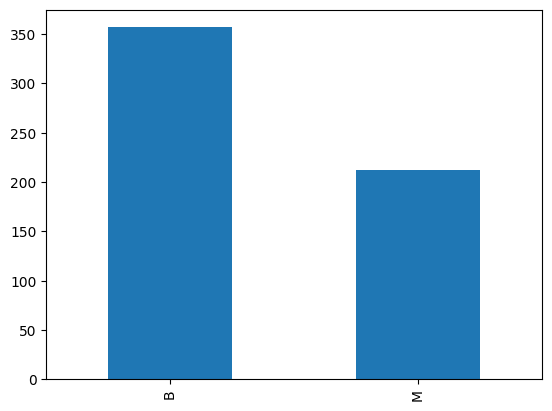

In [232]:
print(cancer_data['diagnosis'].value_counts().plot.bar())

In [167]:
cancer_data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [168]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [148]:
cancer_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [171]:
#define target(y) and features(x)
cancer_data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [169]:
y=cancer_data['diagnosis']

In [172]:
x=cancer_data.drop(['id','diagnosis','Unnamed: 32'],axis=1)

In [173]:
#train and split data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=2529)
x_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
144,10.75,14.97,68.26,355.3,0.07793,0.05139,0.02251,0.007875,0.1399,0.05688,...,11.95,20.72,77.79,441.2,0.1076,0.1223,0.09755,0.03413,0.2300,0.06769
207,17.01,20.26,109.70,904.3,0.08772,0.07304,0.06950,0.053900,0.2026,0.05223,...,19.80,25.05,130.00,1210.0,0.1111,0.1486,0.19320,0.10960,0.3275,0.06469
89,14.64,15.24,95.77,651.9,0.11320,0.13390,0.09966,0.070640,0.2116,0.06346,...,16.34,18.24,109.40,803.6,0.1277,0.3089,0.26040,0.13970,0.3151,0.08473
230,17.05,19.08,113.40,895.0,0.11410,0.15720,0.19100,0.109000,0.2131,0.06325,...,19.59,24.89,133.50,1189.0,0.1703,0.3934,0.50180,0.25430,0.3109,0.09061
36,14.25,21.72,93.63,633.0,0.09823,0.10980,0.13190,0.055980,0.1885,0.06125,...,15.89,30.36,116.20,799.6,0.1446,0.4238,0.51860,0.14470,0.3591,0.10140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,13.16,20.54,84.06,538.7,0.07335,0.05275,0.01800,0.012560,0.1713,0.05888,...,14.50,28.46,95.29,648.3,0.1118,0.1646,0.07698,0.04195,0.2687,0.07429
380,11.27,12.96,73.16,386.3,0.12370,0.11110,0.07900,0.055500,0.2018,0.06914,...,12.84,20.53,84.93,476.1,0.1610,0.2429,0.22470,0.13180,0.3343,0.09215
399,11.80,17.26,75.26,431.9,0.09087,0.06232,0.02853,0.016380,0.1847,0.06019,...,13.45,24.49,86.00,562.0,0.1244,0.1726,0.14490,0.05356,0.2779,0.08121
562,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.094290,0.2128,0.07152,...,17.52,42.79,128.70,915.0,0.1417,0.7917,1.17000,0.23560,0.4089,0.14090


In [174]:
#check shape of train and test sample
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((398, 30), (171, 30), (398,), (171,))

In [175]:
#select a model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=5000)

In [176]:
#train or fit a model
model.fit(x_train, y_train)

LogisticRegression(max_iter=5000)

In [177]:
model.intercept_

array([-30.20269391])

In [178]:
model.coef_

array([[-0.8644508 , -0.1823121 ,  0.26510852, -0.02688942,  0.13284582,
         0.19445151,  0.40918278,  0.20206338,  0.17199488,  0.03798515,
         0.0192444 , -1.13284188, -0.13597054,  0.11911954,  0.02266663,
        -0.03006638,  0.04691738,  0.02805721,  0.03329433, -0.00980702,
        -0.27140621,  0.44034405,  0.16566196,  0.01286379,  0.2719812 ,
         0.59704539,  1.06177846,  0.40903862,  0.51193487,  0.08436947]])

In [187]:
#prediction
y_pred=model.predict(x_test)

In [188]:
y_pred

array(['B', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B',
       'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'M', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'M', 'M',
       'M', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B',
       'M', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M',
       'M', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'B'], dtype=object)

In [189]:
#model accuracry
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [235]:
cm_df=confusion_matrix(y_test,y_pred)
cm_df

array([[97,  5],
       [ 2, 67]])

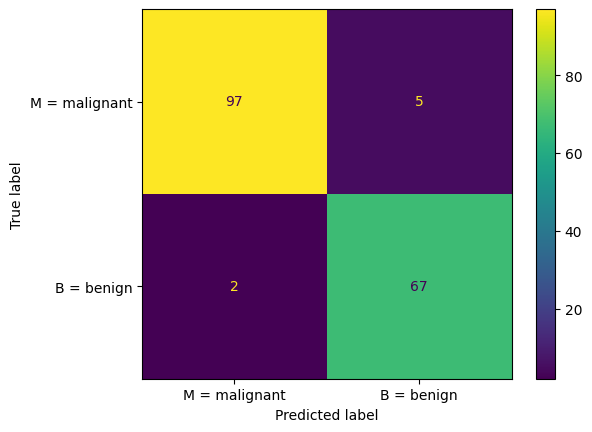

In [257]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
cm_disp=ConfusionMatrixDisplay(confusion_matrix=cm_df,display_labels=['M = malignant', 'B = benign'])
cm_disp.plot()

In [214]:
accuracy_score(y_pred,y_test)

0.9590643274853801

In [261]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           B       0.98      0.95      0.97       102
           M       0.93      0.97      0.95        69

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

